# 线性回归的简洁实现

## 一次函数梯度下降拟合

In [1]:
import torch
import numpy
import random
import matplotlib
import matplotlib.pyplot as plt
numpy.set_printoptions(precision=4, suppress=True)
torch.set_printoptions(precision=4, sci_mode=False)

### 数据生成

In [2]:
def artificialData(weights, bias, dataSize):
    features = torch.normal(mean=0, std=1, size=(dataSize, len(weights)))
    noises = torch.normal(mean=0, std=0.1, size=(dataSize, len(weights)))
    labels = torch.matmul(features+noises, weights) + bias
    return features, labels.reshape((-1, 1))

In [3]:
trueW = torch.tensor([2., 1., 7.2])
trueB = torch.tensor(12.1)
dataSize = 1000
features, labels = artificialData(trueW, trueB, dataSize)

### 数据集的读取

In [4]:
def loadData(data, batchSize, isTrain=True):
    dataset = torch.utils.data.TensorDataset(*data)
    return torch.utils.data.DataLoader(dataset, batchSize, shuffle=isTrain)

batchSize = 100
dataIteration = loadData((features, labels), batchSize)

### 定义模型与初始化模型参数

In [5]:
net = torch.nn.Sequential(torch.nn.Linear(trueW.numel(), 1))

In [6]:
net[0].weight.data.normal_(mean=0.0, std=0.1)
net[0].bias.data.fill_(0.)

tensor([0.])

### 定义损失函数

In [7]:
loss = torch.nn.MSELoss()

### 定义梯度下降算法

In [8]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

### 训练过程

In [9]:
epochs = 500
for epoch in range(epochs):
    for X, y in dataIteration:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()

In [10]:
w = net[0].weight.data[0]
b = net[0].bias.data
print("pred:", w, b)
print("true:", trueW, trueB)

pred: tensor([1.9908, 1.0186, 7.2124]) tensor([12.0447])
true: tensor([2.0000, 1.0000, 7.2000]) tensor(12.1000)


## 练习: 多层神经网络的训练

In [1]:
import torch
import matplotlib.pyplot as plt
torch.set_printoptions(precision=4, sci_mode=False)

### 数据生成

In [2]:
def artificialData(weights, dataSize):
    a, b, c = weights
    features = torch.normal(mean=-b/(2*a), std=torch.abs(1/a), size=(dataSize, 1))
    labels = a*features**2 + b*features + c
    labels += torch.normal(mean=0, std=0.1, size=labels.shape)
    return features, labels

In [3]:
dataSize = 10000
trueW = torch.tensor([-3., 6., 0.5])
features, labels = artificialData(trueW, dataSize)
features = torch.cat((features**2, features, torch.full_like(features, 1.)), dim=1)

### 数据读取

In [4]:
batchSize = 256
dataset = torch.utils.data.TensorDataset(features, labels)
dataIteration = torch.utils.data.DataLoader(dataset, batchSize, shuffle=True)

### 初始化模型

In [5]:
net = torch.nn.Sequential(torch.nn.Linear(3, 12), torch.nn.Linear(12, 1))

for i in range(len(net)):
    net[i].weight.data.normal_(mean=0, std=0.1)
    net[i].bias.data.fill_(0.)

### 定义训练参数

In [6]:
loss = torch.nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

### 训练过程

In [7]:
epochs = 50
for epoch in range(epochs):
    for X, y in dataIteration:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()

### 验证结果

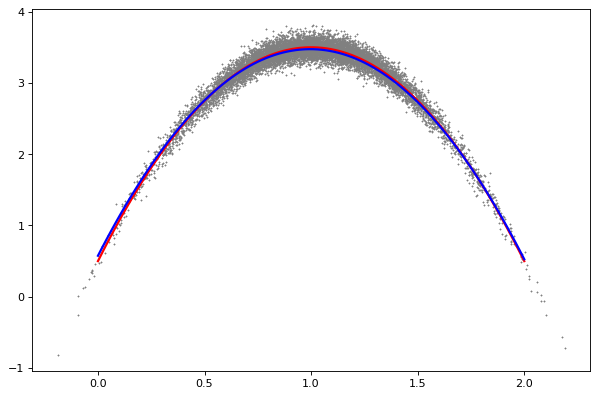

In [8]:
# 蓝色为预测方程, 红色为实际方程
fig = plt.figure(figsize=(9, 6), dpi=80)
a, b, c = trueW
trueX = torch.linspace(-b/(2*a)-torch.abs(3/a), -b/(2*a)+torch.abs(3/a), 100)
trueY = a*trueX**2+b*trueX+c
predY = net(torch.cat((((trueX.reshape(-1, 1))**2), trueX.reshape(-1, 1), torch.full_like(trueX.reshape(-1, 1), 1.)), dim=1)).detach()
plt.scatter(features[:, 1], labels, marker='x', s=0.5, c='grey')
plt.plot(trueX, trueY, linewidth=2, c='r')
plt.plot(trueX, predY, linewidth=2, c='b')
plt.show()